In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections.abc import Sequence
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier
import io

In [11]:
from google.colab import files
uploaded = files.upload()

Saving ALLFLOWMETER_HIKARI2021.csv to ALLFLOWMETER_HIKARI2021 (1).csv


In [14]:
df = pd.read_csv(io.BytesIO(uploaded['ALLFLOWMETER_HIKARI2021.csv']))

In [16]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'])

In [17]:
df.head()

,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
0,Cg61Jch3vdz9DBptj,103.255.15.23,13316,128.199.242.104,443,2.207588,15,14,6,6,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,29200,65160,0,Bruteforce-XML,1
1,CdRIlqLWdj35Y9vW9,103.255.15.23,13318,128.199.242.104,443,15.624266,15,14,6,6,...,1.534300e+07,1.534300e+07,1.534300e+07,1.534300e+07,0.0,29200,65160,0,Bruteforce-XML,1
2,CLzp9Khd0Y09Qkgrg,103.255.15.23,13320,128.199.242.104,443,12.203357,14,13,6,5,...,1.196814e+07,1.196814e+07,1.196814e+07,1.196814e+07,0.0,29200,65160,0,Bruteforce-XML,1
3,Cnf1YA4iLB4CSNWB88,103.255.15.23,13322,128.199.242.104,443,9.992448,14,13,6,5,...,9.759205e+06,9.759205e+06,9.759205e+06,9.759205e+06,0.0,29200,65160,0,Bruteforce-XML,1
4,C4ZKvv3fpO72EAOsJ6,103.255.15.23,13324,128.199.242.104,443,7.780611,14,14,6,5,...,7.545305e+06,7.545305e+06,7.545305e+06,7.545305e+06,0.0,29200,65160,0,Bruteforce-XML,1


In [18]:
df['traffic_category'].value_counts(normalize=True)

Benign                 0.625688
Background             0.306425
Probing                0.042119
Bruteforce             0.010596
Bruteforce-XML         0.009266
XMRIGCC CryptoMiner    0.005905
Name: traffic_category, dtype: float64

In [19]:
# Only want to look at probing for the problem statement and there is a decent amount of data for this
df[df['traffic_category'] == 'Probing']

,uid,originh,originp,responh,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,traffic_category,Label
528611,CGUZ413E20vOAvNhB6,103.255.15.150,33864,128.199.242.104,443,134.545802,1308,2571,1290,1292,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,0,Probing,1
528612,CtEHvV2t8Szv3EMrH4,103.255.15.150,33866,128.199.242.104,443,133.710978,1287,2530,1264,1269,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,0,Probing,1
528613,Ck8Zli1W2a7NZ1LYf2,103.255.15.150,33868,128.199.242.104,443,133.558816,1280,2525,1263,1265,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,0,Probing,1
528614,CWTrKw3CQJJ6cxZIV1,103.255.15.150,33870,128.199.242.104,443,133.516534,17,17,7,8,...,2.756750e+07,1.051647e+08,1.327322e+08,6.636612e+07,5.486954e+07,29200,65160,0,Probing,1
528615,CDlGBc2wH71BlkMHWb,103.255.15.150,33872,128.199.242.104,443,133.430967,1287,2544,1270,1274,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,0,Probing,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551994,CWnqOE3MwhYBqWV0l5,103.255.15.150,33848,128.199.242.104,443,0.249909,10,14,3,8,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Probing,1
551995,Cc9GuT23r4uUSE8Syf,103.255.15.150,33852,128.199.242.104,443,0.253536,9,12,3,7,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Probing,1
551996,CEo1Cq1YIRzA5Tmzyi,103.255.15.150,33854,128.199.242.104,443,0.258555,9,12,3,7,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Probing,1
551997,CwnAuE4prskuSDNTq6,103.255.15.150,33856,128.199.242.104,443,0.244943,10,13,3,8,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200,65160,402,Probing,1


In [20]:
df.dtypes

uid                     object
originh                 object
originp                  int64
responh                 object
responp                  int64
                         ...  
fwd_init_window_size     int64
bwd_init_window_size     int64
fwd_last_window_size     int64
traffic_category        object
Label                    int64
Length: 86, dtype: object

In [21]:
df.describe()

,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
count,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,555278.000000,...,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,5.552780e+05,555278.000000,555278.000000,555278.000000,555278.000000
mean,38673.198034,5082.161647,9.306544,18.264091,18.892578,7.956928,15.803417,1720.704202,1674.140666,3394.844869,...,1.335883e+05,3.490637e+06,5.000630e+06,8.312942e+06,4.073219e+06,7.992576e+05,14750.725718,21005.879513,4546.872210,0.067887
std,18071.825216,12915.812900,101.802730,463.901484,469.078877,73.441224,467.349374,4994.579973,4548.503983,9316.856663,...,8.289045e+06,1.804930e+07,2.326516e+07,9.683372e+07,1.915958e+07,7.206576e+06,15003.491439,29155.406813,11069.456088,0.251552
min,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,28581.000000,53.000000,0.000311,1.000000,1.000000,1.000000,0.000000,4.430152,3.168143,7.624355,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,42693.500000,443.000000,0.026218,2.000000,2.000000,2.000000,2.000000,39.760205,43.938937,82.775849,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5840.000000,0.000000,0.000000,0.000000
75%,53120.000000,443.000000,0.347231,10.000000,12.000000,3.000000,5.000000,80.376058,80.237673,160.578254,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,29200.000000,65160.000000,402.000000,0.000000
max,65535.000000,65522.000000,17393.030600,326292.000000,326827.000000,3953.000000,326822.000000,223696.213333,110376.421053,223696.213333,...,5.438463e+09,2.998038e+08,2.998038e+08,1.738680e+10,2.998038e+08,2.029962e+08,65535.000000,65535.000000,65535.000000,1.000000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555278 entries, 0 to 555277
Data columns (total 86 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   uid                       555278 non-null  object 
 1   originh                   555278 non-null  object 
 2   originp                   555278 non-null  int64  
 3   responh                   555278 non-null  object 
 4   responp                   555278 non-null  int64  
 5   flow_duration             555278 non-null  float64
 6   fwd_pkts_tot              555278 non-null  int64  
 7   bwd_pkts_tot              555278 non-null  int64  
 8   fwd_data_pkts_tot         555278 non-null  int64  
 9   bwd_data_pkts_tot         555278 non-null  int64  
 10  fwd_pkts_per_sec          555278 non-null  float64
 11  bwd_pkts_per_sec          555278 non-null  float64
 12  flow_pkts_per_sec         555278 non-null  float64
 13  down_up_ratio             555278 non-null  f

In [23]:
df = df[(df['traffic_category'] == 'Benign') | (df['traffic_category'] == 'Probing')]

In [24]:
fvalue_selector = SelectKBest(f_classif, k=10)
X_best_features = fvalue_selector.fit_transform(
    df.select_dtypes(include=[np.number]).drop(columns=['Label']), df['Label'])

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [23 24] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [25]:
df.columns[fvalue_selector.get_support(indices=True)].tolist()

['fwd_pkts_per_sec',
 'down_up_ratio',
 'fwd_header_size_min',
 'fwd_header_size_max',
 'bwd_header_size_min',
 'flow_CWR_flag_count',
 'fwd_pkts_payload.max',
 'fwd_bulk_packets',
 'idle.tot',
 'idle.avg']

In [26]:
df.groupby('Label')['fwd_pkts_per_sec'].mean()

Label
0    1184.568194
1      34.322741
Name: fwd_pkts_per_sec, dtype: float64

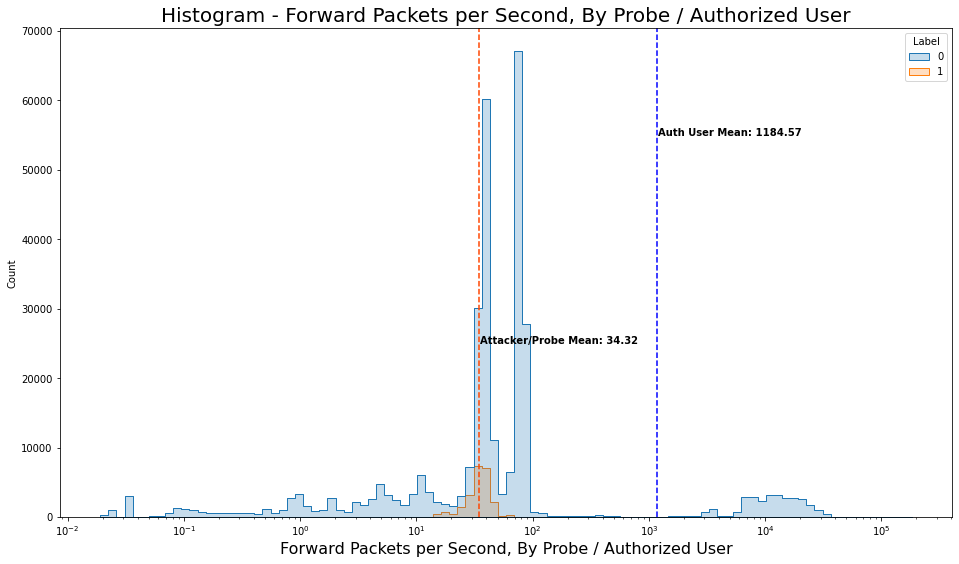

In [27]:
plt.figure(figsize=(16,9))
plt.title('Histogram - Forward Packets per Second, By Probe / Authorized User', fontsize=20)
plt.xlabel('Forward Packets per Second, By Probe / Authorized User', fontsize=16)

auth_user_fp_mean = df.groupby('Label')['fwd_pkts_per_sec'].mean()[0]
attacker_fp_mean = df.groupby('Label')['fwd_pkts_per_sec'].mean()[1]

# Auth User Mean Line
plt.axvline(
    auth_user_fp_mean, 
    c='blue', 
    ls='--')
plt.text(
    auth_user_fp_mean + 2, 
    55000,
    f'Auth User Mean: {round(auth_user_fp_mean, 2)}',
    weight='bold')

# Attacker Mean Line
plt.axvline(
    attacker_fp_mean, 
    c='orangered', 
    ls='--')
plt.text(
    attacker_fp_mean + 1, 
    25000,
    f'Attacker/Probe Mean: {round(attacker_fp_mean, 2)}',
    weight='bold')

sns.histplot(df[df['fwd_pkts_per_sec'] > 0], x='fwd_pkts_per_sec', hue='Label', element='step', log_scale=True, bins=100);

In [28]:
# Not enough observations to represent on a visualization
df.groupby('Label')['flow_CWR_flag_count'].mean()

Label
0    0.000147
1    0.000000
Name: flow_CWR_flag_count, dtype: float64

In [29]:
df.groupby('Label')['idle.tot'].mean()

Label
0    7.381650e+06
1    3.468229e+05
Name: idle.tot, dtype: float64

In [30]:
df.groupby('Label')['idle.avg'].mean()

Label
0    4.015026e+06
1    2.389896e+05
Name: idle.avg, dtype: float64

In [31]:
df.groupby('Label')['flow_duration'].mean()

Label
0    8.261962
1    2.585869
Name: flow_duration, dtype: float64

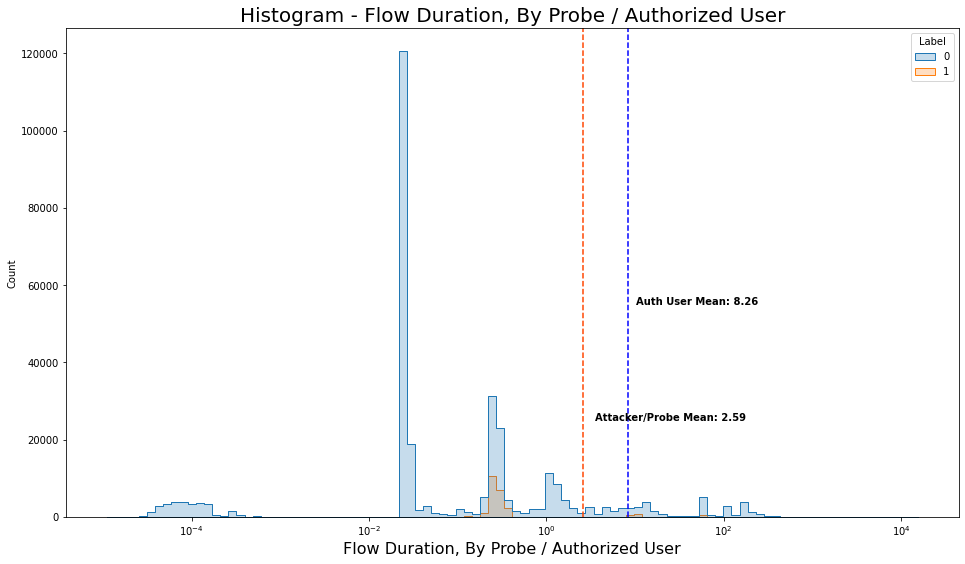

In [32]:
plt.figure(figsize=(16,9))
plt.title('Histogram - Flow Duration, By Probe / Authorized User', fontsize=20)
plt.xlabel('Flow Duration, By Probe / Authorized User', fontsize=16)

auth_user_fd_mean = df.groupby('Label')['flow_duration'].mean()[0]
attacker_fd_mean = df.groupby('Label')['flow_duration'].mean()[1]

# Auth User Mean Line
plt.axvline(
    auth_user_fd_mean, 
    c='blue', 
    ls='--')
plt.text(
    auth_user_fd_mean + 2, 
    55000,
    f'Auth User Mean: {round(auth_user_fd_mean, 2)}',
    weight='bold')

# Attacker Mean Line
plt.axvline(
    attacker_fd_mean, 
    c='orangered', 
    ls='--')
plt.text(
    attacker_fd_mean + 1, 
    25000,
    f'Attacker/Probe Mean: {round(attacker_fd_mean, 2)}',
    weight='bold')

sns.histplot(df[df['flow_duration'] > 0], x='flow_duration', hue='Label', element='step', log_scale=True, bins=100);

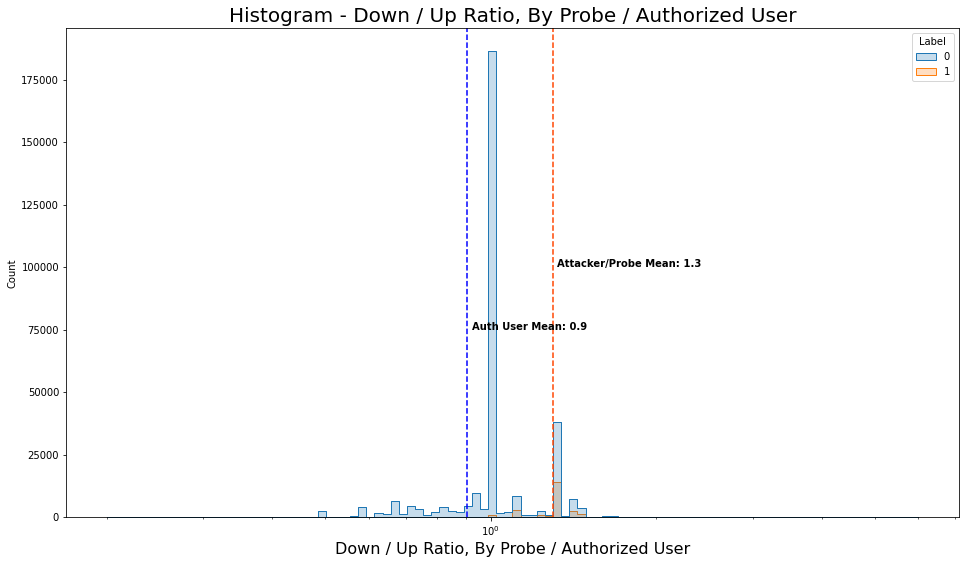

In [33]:
plt.figure(figsize=(16,9))
plt.title('Histogram - Down / Up Ratio, By Probe / Authorized User', fontsize=20)
plt.xlabel('Down / Up Ratio, By Probe / Authorized User', fontsize=16)

auth_user_dur_mean = df.groupby('Label')['down_up_ratio'].mean()[0]
attacker_dur_mean = df.groupby('Label')['down_up_ratio'].mean()[1]

# Auth User Mean Line
plt.axvline(
    auth_user_dur_mean, 
    c='blue', 
    ls='--')
plt.text(
    auth_user_dur_mean + .02, 
    75000,
    f'Auth User Mean: {round(auth_user_dur_mean, 2)}',
    weight='bold')

# Attacker Mean Line
plt.axvline(
    attacker_dur_mean, 
    c='orangered', 
    ls='--')
plt.text(
    attacker_dur_mean + .02, 
    100000,
    f'Attacker/Probe Mean: {round(attacker_dur_mean, 2)}',
    weight='bold')

sns.histplot(df[df['down_up_ratio'] > 0], x='down_up_ratio', hue='Label', element='step', log_scale=True, bins=100);

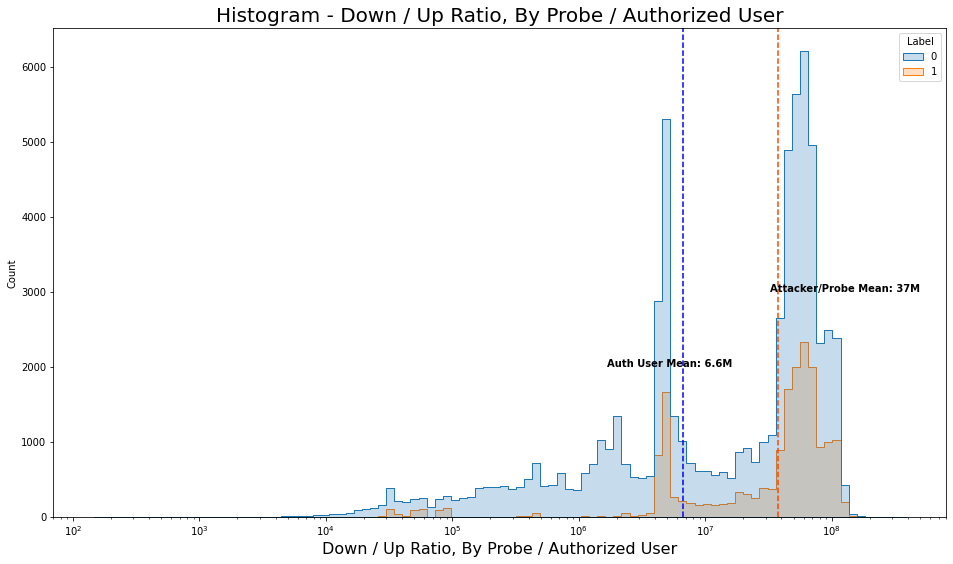

In [34]:
plt.figure(figsize=(16,9))
plt.title('Histogram - Down / Up Ratio, By Probe / Authorized User', fontsize=20)
plt.xlabel('Down / Up Ratio, By Probe / Authorized User', fontsize=16)

auth_user_bbulk_mean = df.groupby('Label')['bwd_bulk_rate'].mean()[0]
attacker_bbulk_mean = df.groupby('Label')['bwd_bulk_rate'].mean()[1]

# Auth User Mean Line
plt.axvline(
    auth_user_bbulk_mean, 
    c='blue', 
    ls='--')
plt.text(
    auth_user_bbulk_mean - 5000000, 
    2000,
    f'Auth User Mean: 6.6M',
    weight='bold')

# Attacker Mean Line
plt.axvline(
    attacker_bbulk_mean, 
    c='orangered', 
    ls='--')
plt.text(
    attacker_bbulk_mean - 5000000, 
    3000,
    f'Attacker/Probe Mean: 37M',
    weight='bold')

sns.histplot(df[df['bwd_bulk_rate'] > 0], x='bwd_bulk_rate', hue='Label', element='step', log_scale=True, bins=100);

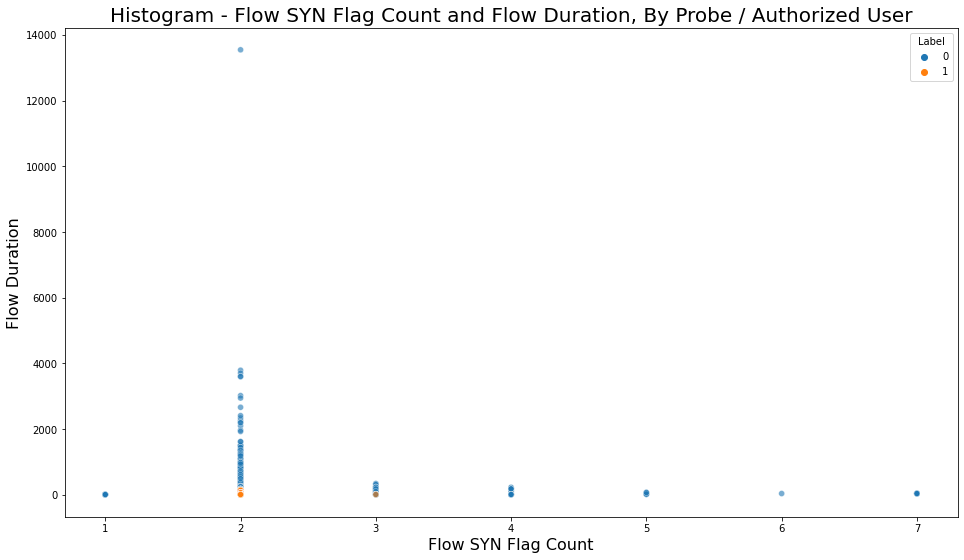

In [35]:
plt.figure(figsize=(16,9))
plt.title('Histogram - Flow SYN Flag Count and Flow Duration, By Probe / Authorized User', fontsize=20)
plt.xlabel('Flow SYN Flag Count', fontsize=16)
plt.ylabel('Flow Duration', fontsize=16)

sns.scatterplot(data=df[df['flow_SYN_flag_count'] > 0], x='flow_SYN_flag_count', y='flow_duration', hue='Label', alpha=0.6);

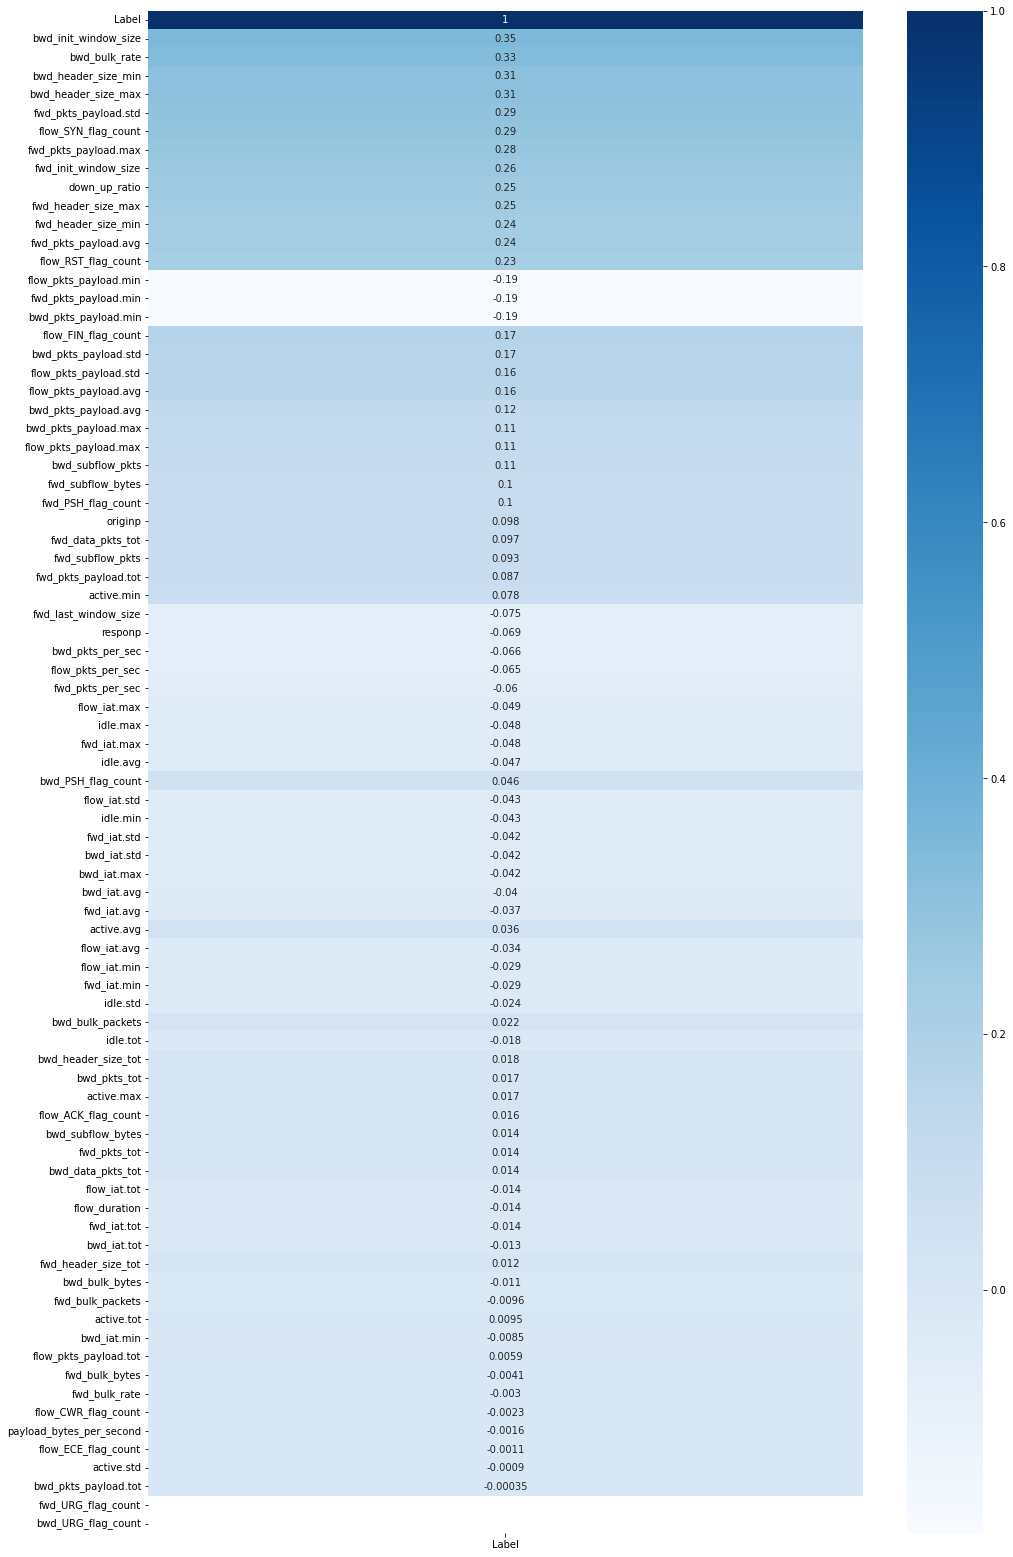

In [36]:
plt.figure(figsize=(16,28))
sns.heatmap(df.corr()[['Label']].sort_values(by='Label', ascending=False, key=abs), annot=True, cmap='Blues');

In [37]:
df_numeric = df.select_dtypes(include=[np.number])

In [38]:
df_numeric

,originp,responp,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Label
181180,63061,1947,5359.472365,127,0,127,0,0.023696,0.000000,0.023696,...,0.0,4.206444e+07,4.307476e+07,5.359472e+09,4.253549e+07,291118.988688,0,0,0,0
181181,63061,1947,6811.639999,161,0,161,0,0.023636,0.000000,0.023636,...,0.0,4.207135e+07,4.306212e+07,6.811640e+09,4.257275e+07,285948.485423,0,0,0,0
181182,63061,1947,3277.740273,78,0,78,0,0.023797,0.000000,0.023797,...,0.0,4.206999e+07,4.306987e+07,3.277740e+09,4.256806e+07,297213.340679,0,0,0,0
181183,41956,42000,0.000182,1,1,0,0,5489.926702,5489.926702,10979.853403,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,29200,0,29200,0
181184,37708,42001,0.000089,1,1,0,0,11214.716578,11214.716578,22429.433155,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,29200,0,29200,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551994,33848,443,0.249909,10,14,3,8,40.014577,56.020408,96.034986,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,29200,65160,402,1
551995,33852,443,0.253536,9,12,3,7,35.497919,47.330559,82.828479,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,29200,65160,402,1
551996,33854,443,0.258555,9,12,3,7,34.808850,46.411800,81.220650,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,29200,65160,402,1
551997,33856,443,0.244943,10,13,3,8,40.825841,53.073593,93.899434,...,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,29200,65160,402,1


In [39]:
df['Label'].value_counts(normalize=True)

0    0.936929
1    0.063071
Name: Label, dtype: float64

In [40]:
X = df_numeric.drop(columns=['Label'])
y = df['Label']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [42]:
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

## ML Testing

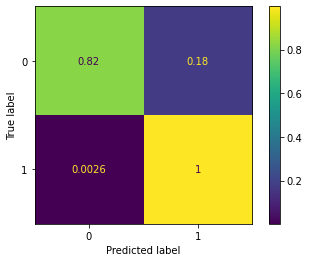

In [72]:
pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('pca', PCA(
        n_components=35, 
        random_state=42
    )),
    ('lr', LogisticRegression(
        max_iter=10000,
        random_state=42
    ))
])

pipe.fit(X_train_sm, y_train_sm)

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, normalize='true');

In [73]:
pipe.score(X_test, y_test)

0.8320119375078655

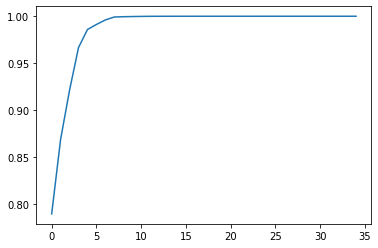

In [44]:
explained_variance = pipe[0].explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)
plt.plot(explained_variance_cumulative);

## NN Testing

In [64]:
def create_model():

  model = Sequential()

  model.add(Dense(35, input_dim=35, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

  return model

In [80]:
estimator = KerasClassifier(
    model=create_model,
    epochs=5, 
    batch_size=None)

In [81]:
pipe = Pipeline([
    ('mms', MinMaxScaler()),
    ('pca', PCA(
        n_components=35, 
        random_state=42
    )),
    ('nn', estimator)
])

pipe.fit(X_train_sm, y_train_sm)

Epoch 1/5
15201/15201 [==============================] - 31s 2ms/step - loss: 0.2490 - acc: 0.9101
Epoch 2/5
15201/15201 [==============================] - 30s 2ms/step - loss: 0.2443 - acc: 0.9110
Epoch 3/5
15201/15201 [==============================] - 30s 2ms/step - loss: 0.2415 - acc: 0.9111
Epoch 4/5
15201/15201 [==============================] - 30s 2ms/step - loss: 0.2321 - acc: 0.9113
Epoch 5/5
15201/15201 [==============================] - 31s 2ms/step - loss: 0.2206 - acc: 0.9114


Pipeline(steps=[('mms', MinMaxScaler()),
                ('pca', PCA(n_components=35, random_state=42)),
                ('nn',
                 KerasClassifier(epochs=5, model=<function create_model at 0x7fef1c48c440>))])